<h4>Reading tabular data from a file in pandas</h4>

In [1]:
import pandas as pd

In [2]:
orders = pd.read_table('http://bit.ly/chiporders')

In [3]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
#read_table assumes the file to be read has tab separated data and a header. In this case both are not true, so we have a special handling
user_cols = ['user_id','age','gender','occupation','zip_code']
users=pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)
users.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


<h4> Selecting a pandas Series from a DataFrame </h4>

In [5]:
import pandas as pd

In [6]:
#If input data/file is ',' separated use read_csv instead of read_table
ufo = pd.read_csv('http://bit.ly/uforeports')

In [7]:
type(ufo)

pandas.core.frame.DataFrame

In [8]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [9]:
type(ufo.City)

pandas.core.series.Series

In [10]:
#Series(each column of a dataframe) can be accessed using ufo['City'] or ufo.City
# If column name has two words sep by space like 'Shape Reported', dot notation will not work
#Above is true if Column name is similar to some builtin name, dot notations would not work in such cases
ufo.City.head()

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [11]:
#Concatenating two Series and having that stored in one Column in the DataFrame
ufo['Location'] = ufo.City + ',' + ufo.State
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca,NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro,NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke,CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene,KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair,NY"


<h4> Some pandas commands end with parentheses, other commands don't? </h4>

In [12]:
import pandas as pd

In [13]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [14]:
#Descriptive statistics of all NUMERIC columns
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [15]:
#Some stats on the input data
movies.shape#Rows and columns

(979, 6)

In [16]:
movies.dtypes#columns with datatypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [17]:
#description of all non-numeric columns
movies.describe(include=['object'])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,Les Miserables,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


<h4> Renaming columns in a pandas DataFrame</h4>

In [18]:
import pandas as pd

In [19]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [20]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [21]:
#Tedious way
ufo.rename(columns={'Colors Reported':'Colors_Reported','Shape Reported':'Shape_Reported'}, inplace=True)

In [22]:
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

In [23]:
#Easier way
ufo_cols=['city','colors reported','shape reported','state','time',] 
ufo.columns = ufo_cols
ufo.head()

,city,colors reported,shape reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [24]:
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [25]:
ufo.columns = ufo.columns.str.replace(' ','_')

In [26]:
ufo.head()

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


<h3> Remove columns from a pandas DataFrame</h3>

In [27]:
import pandas as pd
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()
ufo.drop('Colors Reported',axis=1,inplace=True)#axis 1 is the column axis and axis 0 is for rows
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [28]:
ufo.drop(['City','State'], axis=1, inplace=True)
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


In [29]:
ufo.drop([0,1], axis=0, inplace=True)#Drop first 2 rows
ufo.head()

,Shape Reported,Time
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00
5,DISK,9/15/1934 15:30
6,CIRCLE,6/15/1935 0:00


<h4> Sorting a Pandas DataFrame or Series </h4>

In [30]:
import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [31]:
movies.title.sort_values()#Returns a Series

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
               ...          
955         Zero Dark Thirty
677                   Zodiac
615               Zombieland
526                     Zulu
864                    [Rec]
Name: title, Length: 979, dtype: object

In [32]:
movies.title.sort_values(ascending=False)

864                    [Rec]
526                     Zulu
615               Zombieland
677                   Zodiac
955         Zero Dark Thirty
               ...          
110    2001: A Space Odyssey
698                127 Hours
201         12 Years a Slave
5               12 Angry Men
542     (500) Days of Summer
Name: title, Length: 979, dtype: object

In [33]:
movies.sort_values('title')#Keep rest of the data alongwith the sorted column
                           #Returns DataFrame

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."
910,7.5,2046,R,Drama,129,"[u'Tony Chiu Wai Leung', u'Ziyi Zhang', u'Faye..."
596,7.7,21 Grams,R,Crime,124,"[u'Sean Penn', u'Benicio Del Toro', u'Naomi Wa..."
624,7.7,25th Hour,R,Crime,135,"[u'Edward Norton', u'Barry Pepper', u'Philip S..."
708,7.6,28 Days Later...,R,Horror,113,"[u'Cillian Murphy', u'Naomie Harris', u'Christ..."
60,8.5,3 Idiots,PG-13,Comedy,170,"[u'Aamir Khan', u'Madhavan', u'Mona Singh']"


In [34]:
movies.sort_values('duration', ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
767,7.6,"It's a Mad, Mad, Mad, Mad World",APPROVED,Action,205,"[u'Spencer Tracy', u'Milton Berle', u'Ethel Me..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


In [35]:
movies.sort_values(['content_rating','duration'])

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."
58,8.5,Paths of Glory,APPROVED,Drama,88,"[u'Kirk Douglas', u'Ralph Meeker', u'Adolphe M..."
210,8.1,Laura,APPROVED,Film-Noir,88,"[u'Gene Tierney', u'Dana Andrews', u'Clifton W..."
656,7.7,Snow White and the Seven Dwarfs,APPROVED,Animation,88,"[u'Adriana Caselotti', u'Harry Stockwell', u'L..."
844,7.5,Pinocchio,APPROVED,Animation,88,"[u'Dickie Jones', u'Christian Rub', u'Mel Blanc']"
233,8.1,The Night of the Hunter,APPROVED,Crime,92,"[u'Robert Mitchum', u'Shelley Winters', u'Lill..."


<h4>Filter rows of a DataFrame by column value</h4>

In [36]:
booleans = []
for length in movies.duration: #Pandas Series are iterable
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)
booleans[0:5]

[False, False, True, False, False]

In [37]:
is_long = pd.Series(booleans) #Converting a boolean list of values to Pandas Series
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [38]:
movies[is_long].head()#Amazing! Shows all movies whose duration is atleast 200 mins.

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


In [39]:
is_long = movies.duration >= 200 #Get rid of the for loop written earlier and run a bool condition on the entire column in the DataFrame
is_long.head(), type(is_long)

(0    False
 1    False
 2     True
 3    False
 4    False
 Name: duration, dtype: bool, pandas.core.series.Series)

In [40]:
movies[is_long].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


In [41]:
movies[movies.duration >= 200].head() #Directly use the column condition

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


In [42]:
movies[movies.duration >= 200].genre #Just get the "genre" of the movies whose duration is >=200 mins

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

<h4> Applying multiple filter criteria to a DataFrame</h4>

In [43]:
movies[(movies.duration>=200) & (movies.genre=='Drama')]# Use '&' for AND and '|' for OR condition

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [44]:
movies[movies.genre.isin(['Crime','Drama','Action'])]#Membership check is-in

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


<h4>Reading only specific columns from CSV</h4>

In [45]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [46]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [47]:
ufo = pd.read_csv('http://bit.ly/uforeports',usecols=[0,4])#read only the 0th and 4th column
ufo.columns

Index(['City', 'Time'], dtype='object')

<h4>Iterating the DataFrame</h4>

In [48]:
for index, row in ufo.iterrows():
    print(index, row.City, row.Time)

0 Ithaca 6/1/1930 22:00
1 Willingboro 6/30/1930 20:00
2 Holyoke 2/15/1931 14:00
3 Abilene 6/1/1931 13:00
4 New York Worlds Fair 4/18/1933 19:00
5 Valley City 9/15/1934 15:30
6 Crater Lake 6/15/1935 0:00
7 Alma 7/15/1936 0:00
8 Eklutna 10/15/1936 17:00
9 Hubbard 6/15/1937 0:00
10 Fontana 8/15/1937 21:00
11 Waterloo 6/1/1939 20:00
12 Belton 6/30/1939 20:00
13 Keokuk 7/7/1939 2:00
14 Ludington 6/1/1941 13:00
15 Forest Home 7/2/1941 11:30
16 Los Angeles 2/25/1942 0:00
17 Hapeville 6/1/1942 22:30
18 Oneida 7/15/1942 1:00
19 Bering Sea 4/30/1943 23:00
20 Nebraska 6/1/1943 15:00
21 nan 8/15/1943 0:00
22 nan 8/15/1943 0:00
23 Owensboro 10/15/1943 11:00
24 Wilderness 1/1/1944 10:00
25 San Diego 1/1/1944 12:00
26 Wilderness 1/1/1944 12:00
27 Clovis 4/2/1944 11:00
28 Los Alamos 6/1/1944 12:00
29 Ft. Duschene 6/30/1944 10:00
30 South Kingstown 7/1/1944 20:00
31 North Tampa 7/15/1944 13:00
32 Ft. Lee 1/1/1945 12:00
33 Salinas AFB 6/1/1945 12:00
34 Jasper 6/1/1945 13:30
35 Winston-Salem 6/7/1945 7:0

598 Vassalboro 6/1/1960 20:00
599 Silverfdale 6/1/1960 22:00
600 Santa Ana 6/3/1960 18:00
601 Cape Canaveral 6/6/1960 12:00
602 Philadelphia 6/10/1960 18:00
603 Barstow-Baker 6/11/1960 2:00
604 Great Falls 6/12/1960 14:30
605 Quincy 6/13/1960 2:00
606 Baltimore 6/15/1960 21:00
607 Kansas City 6/15/1960 21:45
608 Chicago 6/18/1960 23:00
609 East Bernstadt 6/21/1960 14:00
610 Albertson 6/30/1960 0:00
611 Litchfield 6/30/1960 12:00
612 Portland 6/30/1960 20:30
613 nan 7/1/1960 12:00
614 Stevens 7/1/1960 12:00
615 Portland 7/1/1960 20:00
616 New Berlin 7/4/1960 21:30
617 Springdale 7/7/1960 22:00
618 La Verne 7/15/1960 1:00
619 Pacific Coast Highway 7/15/1960 10:00
620 Goldsboro 7/15/1960 16:00
621 Amarillo 7/15/1960 21:00
622 Upland 7/30/1960 21:00
623 Allentown 8/1/1960 12:00
624 Taftville 8/1/1960 15:00
625 Boston 8/1/1960 18:00
626 Carteret 8/1/1960 18:00
627 Crystal 8/1/1960 23:00
628 Cherokee 8/2/1960 23:00
629 Belmont 8/10/1960 1:00
630 Watchung 8/10/1960 18:00
631 Cottonwood 8/13/1

1143 Enfield 12/9/1965 17:00
1144 Middletown 12/9/1965 17:00
1145 San Marcos 12/10/1965 21:00
1146 Spartanburg 12/12/1965 23:00
1147 Houston 12/22/1965 9:00
1148 Davidsville 12/24/1965 1:00
1149 Bellmar 12/24/1965 23:59
1150 Flagstaff 1/1/1966 17:00
1151 Leavenworth 1/12/1966 0:00
1152 Fort Smith 1/15/1966 22:00
1153 Ft. Smith 1/15/1966 22:00
1154 Randolph 2/1/1966 1:00
1155 Kent 2/10/1966 18:15
1156 Bakersfield 2/13/1966 17:00
1157 Gibralter 3/8/1966 11:00
1158 Ann Arbor 3/14/1966 20:00
1159 Ft. Worth area 3/15/1966 10:30
1160 Childs 3/15/1966 14:00
1161 Warren 3/15/1966 20:00
1162 St Joseph 3/15/1966 21:00
1163 North Stonington 3/16/1966 8:00
1164 Elizabeth 3/16/1966 22:00
1165 Hillsdale 3/21/1966 21:00
1166 El Paso 3/24/1966 22:10
1167 Auburn 3/26/1966 16:30
1168 Roscoe 3/29/1966 20:00
1169 Dearborn 3/31/1966 23:50
1170 Dearborn 3/31/1966 23:50
1171 Richmond 4/1/1966 19:00
1172 New Braintree 4/1/1966 21:00
1173 Corpus Christi 4/1/1966 23:15
1174 Geneva 4/14/1966 22:30
1175 Interior 

1774 Butte 1/19/1969 22:00
1775 Lake Wales 1/20/1969 19:00
1776 Monroe 2/15/1969 22:00
1777 Omaha 3/1/1969 0:00
1778 Oak Lawn 3/1/1969 15:00
1779 Perth Amboy 3/1/1969 21:00
1780 Oroville 3/15/1969 11:00
1781 Little Axe 3/15/1969 21:00
1782 Loganville 4/1/1969 7:00
1783 City of Commerce 4/5/1969 13:00
1784 At sea 4/15/1969 21:30
1785 Little Rock 4/21/1969 16:30
1786 Youngstown 5/1/1969 5:00
1787 Ridgefield 5/1/1969 6:00
1788 San Diego 5/1/1969 12:00
1789 Wheaton 5/1/1969 20:00
1790 Estill 5/1/1969 22:00
1791 St. Louis 5/15/1969 14:00
1792 Dallas 5/15/1969 20:00
1793 Wilshire 5/15/1969 20:00
1794 Boulder 6/1/1969 1:00
1795 Wacousta 6/1/1969 3:00
1796 Kyle 6/1/1969 12:00
1797 La Puenty 6/1/1969 12:00
1798 Sarasota 6/1/1969 12:00
1799 Barrington 6/1/1969 12:09
1800 Highwood 6/1/1969 13:00
1801 Oahu 6/1/1969 14:00
1802 Highwood 6/1/1969 17:00
1803 Falls Church 6/1/1969 18:45
1804 HWY 77 6/1/1969 21:00
1805 Lawrenceburg 6/1/1969 21:00
1806 Sausalito 6/1/1969 21:00
1807 Akron 6/1/1969 22:00
1

2382 Oak Harbor 6/1/1973 3:00
2383 San Rafael 6/1/1973 13:00
2384 Gainsville 6/1/1973 18:00
2385 Eddington 6/1/1973 19:00
2386 Landis 6/1/1973 19:30
2387 Austin 6/1/1973 21:00
2388 Fredericktown 6/1/1973 21:00
2389 Pensacola 6/1/1973 21:00
2390 Honolulu 6/1/1973 22:30
2391 Larchwood 6/6/1973 22:00
2392 Brockton 6/6/1973 23:00
2393 La Porte 6/7/1973 15:00
2394 Clearfield 6/8/1973 17:00
2395 St. Charles 6/10/1973 21:00
2396 Irwin 6/12/1973 21:00
2397 Blackhawk 6/15/1973 0:00
2398 Mechanicsburg 6/15/1973 0:00
2399 Fort Lawn 6/15/1973 6:00
2400 Huntington Beach 6/15/1973 6:00
2401 Los Alamos 6/15/1973 8:00
2402 Hillsboro 6/15/1973 14:00
2403 Bridgeport 6/15/1973 15:30
2404 Tampa 6/15/1973 19:30
2405 River Vale 6/15/1973 20:00
2406 Decatur 6/15/1973 21:00
2407 Medaryville 6/15/1973 21:00
2408 Ballwin 6/15/1973 21:30
2409 Upper Freehold 6/15/1973 21:50
2410 Citrus Heights 6/15/1973 22:00
2411 Hampton 6/15/1973 22:00
2412 Whitesburg 6/15/1973 22:00
2413 Calera 6/15/1973 22:30
2414 San Jose 6/

2970 Marsh Creek 7/1/1975 16:00
2971 Kansas City 7/1/1975 20:00
2972 Fair Haven 7/4/1975 10:00
2973 Marley Park 7/4/1975 13:00
2974 Golden 7/4/1975 14:00
2975 Franconia Notch 7/5/1975 23:00
2976 Fort Washakie 7/7/1975 19:00
2977 Bellevue 7/8/1975 22:00
2978 Midway 7/8/1975 22:30
2979 Manchester 7/10/1975 1:00
2980 Marlborough 7/10/1975 19:00
2981 Mt. Hope 7/11/1975 20:00
2982 Cassville 7/11/1975 22:00
2983 Shoreline 7/13/1975 19:30
2984 Girard 7/14/1975 21:00
2985 Pound 7/15/1975 1:30
2986 Angleton 7/15/1975 5:00
2987 Mason 7/15/1975 9:30
2988 Flathead Lake 7/15/1975 13:00
2989 Paul 7/15/1975 14:00
2990 Green Bay 7/15/1975 16:00
2991 Birmingham 7/15/1975 17:00
2992 Morehead 7/15/1975 17:00
2993 Ramsey 7/15/1975 18:30
2994 Triadelphia 7/15/1975 18:30
2995 Decatur 7/15/1975 19:00
2996 Brea 7/15/1975 20:00
2997 Wittman 7/15/1975 20:00
2998 Estes Park 7/15/1975 20:30
2999 Raleigh 7/15/1975 21:00
3000 Reseda 7/15/1975 21:00
3001 Smithland 7/15/1975 21:00
3002 Dover 7/15/1975 22:00
3003 Turb

3466 Kinder 5/8/1977 16:00
3467 Kemah 5/10/1977 1:00
3468 Salem 5/15/1977 0:00
3469 Elmont 5/15/1977 8:00
3470 Minneapolis 5/15/1977 23:00
3471 Marana 5/22/1977 20:00
3472 Mettacahonts 5/23/1977 21:00
3473 Marshall 5/25/1977 1:00
3474 Meridian 5/28/1977 0:00
3475 Meridian 5/28/1977 0:01
3476 Los Angeles 5/28/1977 21:00
3477 Watertown 5/29/1977 23:30
3478 Bratenhaul 5/30/1977 10:00
3479 Clements 6/1/1977 0:00
3480 Miami 6/1/1977 0:00
3481 Raymond 6/1/1977 0:30
3482 Hesperia 6/1/1977 1:00
3483 Coral Springs 6/1/1977 1:30
3484 Hanna City 6/1/1977 2:00
3485 Plantation 6/1/1977 2:00
3486 Shaver Lake 6/1/1977 3:30
3487 Fort Worth 6/1/1977 16:00
3488 Shelby 6/1/1977 17:00
3489 Meriden 6/1/1977 20:00
3490 San Antonio 6/1/1977 21:00
3491 Butte Meadows 6/1/1977 22:00
3492 Hart's Location 6/1/1977 22:00
3493 John Day 6/1/1977 22:00
3494 Simi Valley 6/1/1977 22:00
3495 Grand Forks 6/1/1977 23:00
3496 Houtzdale R.D. 6/1/1977 23:00
3497 Yazoo City 6/1/1977 23:00
3498 Hudson 6/1/1977 23:30
3499 Gaith

4003 Hopewell 12/31/1978 0:30
4004 Hwy 80 1/1/1979 2:00
4005 Orange 1/1/1979 17:00
4006 Redondo Beach 1/1/1979 20:00
4007 Norman 1/2/1979 3:00
4008 Key West 1/9/1979 14:30
4009 Los Angeles 1/15/1979 17:00
4010 Clines Corners 1/15/1979 20:00
4011 Salt Lake City 1/15/1979 20:30
4012 Houston 1/31/1979 11:00
4013 Lake Arrowhead 2/1/1979 2:30
4014 Tallmadge 2/5/1979 21:00
4015 Helena 2/10/1979 9:30
4016 Huntersville 2/10/1979 23:00
4017 Louden County 2/11/1979 14:00
4018 Alexandria 2/13/1979 1:00
4019 Grover Beach 2/15/1979 21:30
4020 Pismo Beach 2/20/1979 2:00
4021 Tallmadge 2/25/1979 21:00
4022 Medford 3/1/1979 4:00
4023 Downey 3/1/1979 23:29
4024 Buies Creek 3/10/1979 2:00
4025 California Hot Springs 3/10/1979 20:00
4026 Lee's Summit 3/11/1979 16:00
4027 Woodinville 3/15/1979 19:00
4028 Baker City 3/24/1979 22:00
4029 Big Sur 3/25/1979 20:00
4030 North Webster 3/25/1979 23:50
4031 Middletown 3/29/1979 5:30
4032 Between Jackson Fla. 3/30/1979 22:00
4033 Middletown 3/31/1979 6:10
4034 Sali

4499 McKinleyville 3/1/1981 17:45
4500 Campbell 3/1/1981 22:00
4501 Needles 3/15/1981 0:00
4502 Pompano Beach 3/25/1981 19:30
4503 Sarasota 3/25/1981 20:00
4504 Arenzville 4/1/1981 21:00
4505 Tomberlin 4/12/1981 3:00
4506 Milwaukie 4/14/1981 0:00
4507 Mohave Desert 4/14/1981 17:00
4508 Burbank 4/15/1981 15:00
4509 Long Beach 4/18/1981 17:00
4510 Citrus Heights 4/22/1981 15:00
4511 Rochester 4/23/1981 21:20
4512 Bridgewater 4/25/1981 20:00
4513 Petaluma 4/28/1981 23:30
4514 no data 4/30/1981 23:00
4515 Boulder 5/1/1981 18:30
4516 San Diego 5/1/1981 20:00
4517 Scottsdale 5/9/1981 0:00
4518 Wayne 5/10/1981 21:00
4519 Twenty Nine Palms 5/15/1981 2:00
4520 Grass Valley 5/15/1981 16:00
4521 Durham 5/20/1981 22:00
4522 Humboldt 5/20/1981 23:00
4523 Sierra Vista 5/25/1981 20:30
4524 Camden 6/1/1981 0:00
4525 The Dalles 6/1/1981 17:00
4526 Lake Morena 6/1/1981 19:00
4527 South Saint Paul 6/1/1981 19:00
4528 Detroit 6/1/1981 20:00
4529 Kittanning 6/1/1981 20:00
4530 Mesa 6/1/1981 20:00
4531 New 

5007 Alton 3/18/1984 2:30
5008 Newburgh 3/24/1984 8:00
5009 Mettacahonts 3/27/1984 20:00
5010 Rosendale 3/27/1984 23:00
5011 Griffin 3/30/1984 13:00
5012 Arlington 4/5/1984 21:30
5013 Monahans 4/11/1984 2:00
5014 Southwest City 4/11/1984 21:30
5015 Branford 4/15/1984 0:00
5016 Lake Worth 4/15/1984 2:00
5017 Elizabethtown 4/15/1984 15:00
5018 Yelvington 4/15/1984 21:00
5019 Magnolia 4/21/1984 22:00
5020 Auburn 4/23/1984 5:30
5021 Joliet 5/1/1984 18:00
5022 Glen Rose 5/1/1984 19:00
5023 Burnsville 5/1/1984 20:00
5024 Proctorville 5/5/1984 12:00
5025 Cloquet 5/5/1984 22:00
5026 Los Angeles 5/14/1984 15:00
5027 Cleveland 5/15/1984 16:00
5028 Flower Mound 5/15/1984 18:45
5029 Winchester 5/15/1984 23:00
5030 Barstow 5/20/1984 21:00
5031 Marlette 5/20/1984 22:30
5032 Longview 5/21/1984 21:30
5033 Huntsville 6/1/1984 0:00
5034 Huntsville 6/1/1984 0:00
5035 Mayfield 6/1/1984 0:00
5036 Sweetwater 6/1/1984 0:00
5037 Tampa 6/1/1984 2:20
5038 Colfax 6/1/1984 12:00
5039 Orlando 6/1/1984 12:00
5040 B

5523 Tucson 9/20/1986 23:50
5524 Jasper 9/21/1986 6:30
5525 Fredericksburg 9/22/1986 16:00
5526 Klamath Falls 10/1/1986 1:00
5527 N. Ridgeville 10/1/1986 22:00
5528 Wheeling 10/1/1986 22:00
5529 Bakersfield 10/3/1986 21:00
5530 Cresson 10/3/1986 21:00
5531 Holmes 10/10/1986 20:00
5532 San Jose 10/14/1986 20:30
5533 Orangeburg 10/15/1986 2:00
5534 Salem 10/15/1986 2:30
5535 Pinson 10/15/1986 14:00
5536 Bellevue 10/15/1986 18:00
5537 Knoxville 10/15/1986 19:00
5538 Petaluma 10/15/1986 19:00
5539 Ridgecrest 10/15/1986 19:20
5540 Fayettville 10/15/1986 21:00
5541 Onyx 10/15/1986 22:00
5542 Eglin AFB 10/17/1986 17:00
5543 Bartlesville 10/17/1986 18:00
5544 Raleigh 10/20/1986 19:00
5545 Selma 10/22/1986 22:00
5546 Decatur 10/26/1986 13:30
5547 Decatur City 10/30/1986 13:30
5548 Riverdale 10/31/1986 3:00
5549 Landaff 11/1/1986 22:50
5550 Martinsburg 11/1/1986 23:45
5551 Arvada 11/3/1986 20:30
5552 Grass Valley 11/10/1986 23:55
5553 Ft. Richardson 11/15/1986 0:00
5554 Girdwood 11/15/1986 14:30

6034 New Lenox 3/6/1989 1:00
6035 Sheridan 3/10/1989 22:30
6036 Houston 3/12/1989 23:45
6037 Tulsa 3/15/1989 19:00
6038 Rockfish 3/15/1989 19:30
6039 Woodstock 3/15/1989 23:30
6040 Grand Junction 4/1/1989 9:30
6041 Wallops Island 4/2/1989 13:00
6042 Idaho Falls 4/15/1989 3:30
6043 Mentone 4/16/1989 18:00
6044 New York City 4/19/1989 20:00
6045 Walnut Cove 4/21/1989 1:00
6046 Port Townsend 4/23/1989 14:00
6047 Lemoore 5/1/1989 17:00
6048 Golden Shores 5/1/1989 22:00
6049 Palo 5/1/1989 22:00
6050 Tuttle 5/1/1989 22:00
6051 Sedona 5/5/1989 17:00
6052 Talladega 5/7/1989 11:50
6053 Richmond 5/8/1989 14:00
6054 Tucson 5/10/1989 11:00
6055 Wichita Falls 5/12/1989 14:30
6056 Tazewell 5/12/1989 23:00
6057 Louisiana 5/15/1989 1:00
6058 Malvern 5/15/1989 1:00
6059 Tyler 5/15/1989 2:00
6060 Hooksett 5/15/1989 14:00
6061 Interstate 40 5/15/1989 20:00
6062 Barneveld 5/15/1989 21:30
6063 Manassas 5/15/1989 21:30
6064 Ridgecrest 5/15/1989 22:00
6065 Kent 5/15/1989 22:30
6066 Quitman 5/19/1989 20:00
60

6542 Huntington Beach 5/11/1991 14:00
6543 Phoenix 5/11/1991 22:30
6544 Pittsburg 5/13/1991 23:30
6545 Central Texas 5/15/1991 9:41
6546 Dayton 5/17/1991 5:00
6547 Atlanta 5/20/1991 4:00
6548 Northfield 5/20/1991 21:00
6549 Hampstead 5/25/1991 21:00
6550 Lone Pine 5/25/1991 21:00
6551 Las Cruces 5/30/1991 9:10
6552 Marshall 5/31/1991 13:00
6553 Rio Rancho 6/1/1991 0:00
6554 Yuma 6/1/1991 2:00
6555 Port Vue 6/1/1991 4:00
6556 Port St. Lucie 6/1/1991 10:30
6557 Roseville 6/1/1991 12:00
6558 Whitestone 6/1/1991 13:00
6559 Central Islip 6/1/1991 16:00
6560 Monument Valley 6/1/1991 17:00
6561 Atlantic City 6/1/1991 18:00
6562 Las Vegas 6/1/1991 18:00
6563 Warrenton 6/1/1991 18:00
6564 Yucca Valley 6/1/1991 18:00
6565 Troy 6/1/1991 19:00
6566 Dwarf 6/1/1991 19:30
6567 South Saint Paul 6/1/1991 22:30
6568 Highway 24 6/1/1991 23:00
6569 Canton 6/1/1991 23:30
6570 Flint 6/1/1991 23:30
6571 Dixon 6/3/1991 22:00
6572 Brawley 6/5/1991 17:00
6573 W. Wendover 6/6/1991 20:30
6574 College Park 6/6/199

7049 Mustang 6/1/1993 19:00
7050 Camp Pendelton 6/1/1993 20:00
7051 Oceanside 6/1/1993 20:00
7052 Salton Sea 6/1/1993 20:00
7053 Jamestown 6/1/1993 21:00
7054 San Jose 6/1/1993 21:00
7055 Billings 6/1/1993 22:00
7056 Flagstaff 6/1/1993 22:00
7057 Oconomowoc 6/1/1993 22:00
7058 Seymour 6/1/1993 22:00
7059 Clarksdale 6/1/1993 23:00
7060 Cumberland 6/1/1993 23:00
7061 McClure 6/1/1993 23:00
7062 West Coast, alt. apx 30' k, northerly flight 6/3/1993 6:00
7063 Madison Heights 6/4/1993 21:10
7064 Mammoth Hot Springs 6/4/1993 21:55
7065 Economy Borough 6/5/1993 0:15
7066 Worcester 6/8/1993 16:09
7067 Lusby 6/11/1993 1:00
7068 Kihei 6/11/1993 22:00
7069 Sioux Falls 6/13/1993 15:20
7070 Lafayette 6/13/1993 21:45
7071 Traverse City 6/14/1993 20:00
7072 Des Moines 6/15/1993 0:00
7073 Fort Knox 6/15/1993 0:00
7074 Joplin 6/15/1993 0:00
7075 Rockville 6/15/1993 0:00
7076 Anderson 6/15/1993 1:30
7077 Milton 6/15/1993 2:00
7078 Tracy 6/15/1993 2:00
7079 Grand Rapids 6/15/1993 2:30
7080 Memphis 6/15/1

7548 Tylertown 10/1/1994 17:00
7549 Chicopee 10/1/1994 20:00
7550 Santa Barbara 10/1/1994 20:00
7551 Warsaw 10/1/1994 21:00
7552 Las Vegas 10/1/1994 23:00
7553 Fredericksburg 10/1/1994 23:30
7554 Bingen 10/2/1994 0:00
7555 Circleville 10/5/1994 19:00
7556 Boynton Beach 10/8/1994 13:00
7557 Hialeah 10/9/1994 21:05
7558 Mercedes 10/10/1994 15:00
7559 Burnt Hills 10/10/1994 18:30
7560 Pinebergen 10/10/1994 22:00
7561 Hot Springs 10/11/1994 0:00
7562 Jackson 10/11/1994 2:00
7563 Riverside 10/11/1994 4:00
7564 Schenectady 10/12/1994 11:55
7565 Monticello 10/12/1994 15:00
7566 Farmington 10/13/1994 19:30
7567 Goodlettsville 10/14/1994 4:00
7568 Citra 10/14/1994 19:30
7569 Cornersville 10/14/1994 20:30
7570 Stone Ridge 10/15/1994 13:00
7571 Circleville 10/15/1994 14:00
7572 Bellevue 10/15/1994 16:25
7573 Ithaca 10/15/1994 18:00
7574 Neah Bay 10/15/1994 19:00
7575 Oxley 10/15/1994 19:00
7576 Milwaukee 10/15/1994 20:00
7577 Angola 10/15/1994 21:00
7578 Outside of Delaware 10/15/1994 21:00
7579 

8097 Ozark 5/12/1995 14:00
8098 Santa Fe 5/12/1995 20:00
8099 Duarte 5/12/1995 22:50
8100 Scottsdale 5/13/1995 14:00
8101 Seattle 5/13/1995 19:30
8102 Tampa 5/13/1995 20:25
8103 Neah Bay 5/13/1995 21:30
8104 Framingham 5/13/1995 21:40
8105 Dayton 5/14/1995 0:54
8106 Lake Forest 5/14/1995 3:00
8107 Silver Beach 5/14/1995 20:37
8108 McKenzie 5/15/1995 0:00
8109 Normal 5/15/1995 0:00
8110 Kalama 5/15/1995 3:30
8111 Geneva 5/15/1995 4:00
8112 Sage 5/15/1995 4:30
8113 Portland 5/15/1995 10:30
8114 W. Chicago 5/15/1995 12:30
8115 St. Bonifacious 5/15/1995 15:00
8116 N. Seattle 5/15/1995 16:15
8117 Claverack 5/15/1995 18:00
8118 Killawog 5/15/1995 18:30
8119 Hillsborough 5/16/1995 4:00
8120 Lakewood 5/16/1995 11:00
8121 Lake Oswego 5/16/1995 22:45
8122 Freeport 5/16/1995 23:00
8123 Rochester 5/17/1995 21:05
8124 Middletown 5/18/1995 18:30
8125 Las Vegas 5/18/1995 19:30
8126 W. Salem 5/19/1995 9:55
8127 Glendale 5/19/1995 22:00
8128 Mt. Jackson 5/19/1995 22:15
8129 Federal Way 5/19/1995 22:30


8695 Green Bay 9/20/1995 18:30
8696 Cold Bay 9/20/1995 19:30
8697 Puyallup 9/20/1995 21:00
8698 Sunflower 9/20/1995 22:00
8699 Black Shear 9/20/1995 23:30
8700 Concordia 9/21/1995 21:00
8701 Seattle 9/21/1995 23:00
8702 Virginia Beach 9/22/1995 0:00
8703 Safford 9/22/1995 3:00
8704 Portland 9/22/1995 5:40
8705 Meridian 9/22/1995 16:00
8706 Safford 9/22/1995 21:00
8707 Redmond 9/22/1995 21:30
8708 Lake Charles 9/22/1995 23:30
8709 Washington County 9/23/1995 0:00
8710 Lake Oswego 9/23/1995 15:45
8711 Delta 9/23/1995 21:45
8712 Thibodaux 9/23/1995 23:00
8713 Maple Valley 9/24/1995 0:00
8714 Kissimmee 9/24/1995 20:00
8715 Boise 9/24/1995 20:25
8716 Scappoose 9/24/1995 20:45
8717 Lynnwood 9/24/1995 23:00
8718 Hernando 9/25/1995 0:00
8719 Salt Lake City 9/25/1995 6:01
8720 Lake Oswego 9/25/1995 15:45
8721 Flushing 9/25/1995 20:00
8722 Flushing 9/25/1995 21:18
8723 Seattle 9/25/1995 22:30
8724 Polson 9/25/1995 22:50
8725 Ronan 9/25/1995 23:00
8726 Ringtown 9/27/1995 22:00
8727 Copley 9/28/19

9315 Covington 5/16/1996 21:17
9316 Miami 5/17/1996 1:30
9317 Carneys Point 5/18/1996 12:35
9318 Hampton 5/18/1996 22:30
9319 Seattle 5/18/1996 23:20
9320 Salisbury 5/19/1996 0:00
9321 Santa Barbara 5/19/1996 2:30
9322 Visalia 5/19/1996 21:45
9323 Passaic 5/20/1996 16:00
9324 High Point 5/20/1996 23:00
9325 Burgettstown 5/21/1996 1:00
9326 Charleston 5/21/1996 23:58
9327 Hilliard 5/22/1996 0:00
9328 Venice 5/22/1996 20:30
9329 Huntington 5/22/1996 22:30
9330 Rockford 5/23/1996 22:30
9331 Mint Hill 5/24/1996 20:45
9332 Youngstown 5/24/1996 22:30
9333 Bowie 5/24/1996 23:05
9334 Chico 5/25/1996 23:00
9335 Fort Myers 5/26/1996 1:55
9336 Sullivan 5/26/1996 18:36
9337 Neodesha 5/26/1996 21:20
9338 Riverside 5/26/1996 22:10
9339 Amargosa Valley 5/27/1996 20:30
9340 Baltimore 5/28/1996 3:00
9341 Mindon 5/28/1996 23:10
9342 Antioch 5/29/1996 3:55
9343 Menoken 5/29/1996 23:10
9344 Chinquipin 5/31/1996 3:00
9345 Guerneville 6/1/1996 0:00
9346 Hinckley 6/1/1996 0:00
9347 Longmont 6/1/1996 0:00
934

9893 North Kingstown 1/23/1997 18:30
9894 Alta 1/24/1997 19:00
9895 Marion 1/25/1997 21:00
9896 Flagstaff 1/26/1997 22:00
9897 East Greenwich 1/29/1997 23:15
9898 Alto 2/1/1997 6:35
9899 Yucca Valley 2/1/1997 9:30
9900 Unincorporated 2/1/1997 13:00
9901 Winter Springs 2/1/1997 21:00
9902 Elizabeth 2/1/1997 23:00
9903 Thackery 2/2/1997 8:25
9904 Virden 2/3/1997 20:00
9905 Albuquerque 2/5/1997 22:00
9906 Grove City 2/6/1997 3:15
9907 Mesa 2/6/1997 16:45
9908 Mesa 2/6/1997 16:45
9909 Stacy 2/8/1997 18:00
9910 Seattle 2/9/1997 13:45
9911 Los Angeles 2/10/1997 0:10
9912 Brentwood 2/10/1997 18:00
9913 Phoenix 2/11/1997 11:00
9914 San Antonio 2/12/1997 18:20
9915 Lakewood 2/13/1997 7:00
9916 Las Vegas 2/14/1997 18:00
9917 Ormond Beach 2/14/1997 20:00
9918 La Puente 2/15/1997 3:00
9919 North Adams 2/15/1997 13:00
9920 Prescott Valley 2/15/1997 20:00
9921 Harrisonburg 2/15/1997 21:30
9922 Hudson 2/15/1997 22:30
9923 Blairsville 2/15/1997 23:35
9924 Randolph 2/16/1997 3:00
9925 Pittsburgh 2/17/1

10443 Lansing 6/27/1997 2:40
10444 North Babylon 6/27/1997 20:00
10445 Fountain Hills 6/27/1997 20:30
10446 Harvey's Lake 6/28/1997 8:00
10447 Wilcox 6/28/1997 12:00
10448 Springfield 6/28/1997 18:00
10449 Cave Creek 6/29/1997 22:09
10450 Farmington 6/29/1997 23:45
10451 Bigfork 6/30/1997 1:00
10452 Venice 6/30/1997 5:45
10453 Camarillo 6/30/1997 6:00
10454 Anchorage 6/30/1997 12:00
10455 Salisbury 6/30/1997 12:00
10456 Casa Grande 6/30/1997 21:00
10457 Fort Smith 6/30/1997 21:00
10458 Tijeras 6/30/1997 23:00
10459 Freehold 7/1/1997 0:00
10460 Fort Benning 7/1/1997 0:01
10461 Kilgore 7/1/1997 1:30
10462 Kilgore 7/1/1997 1:30
10463 Albion 7/1/1997 13:00
10464 Omaha 7/1/1997 15:20
10465 Hamilton 7/1/1997 18:00
10466 New York City 7/1/1997 18:00
10467 Kingston 7/1/1997 21:00
10468 Willow Creek 7/1/1997 23:00
10469 Davenport 7/2/1997 21:00
10470 Petaluma 7/2/1997 21:00
10471 Rachel 7/2/1997 21:15
10472 Calistoga 7/2/1997 21:30
10473 South Hadley 7/2/1997 23:00
10474 Boonville 7/2/1997 23:3

11072 Las Vegas 12/20/1997 23:00
11073 Harrisonburg 12/21/1997 5:25
11074 Brewster 12/23/1997 20:00
11075 East Woodstock 12/23/1997 20:00
11076 Charlotte 12/25/1997 2:00
11077 Los Angeles 12/25/1997 9:00
11078 Primrose 12/26/1997 20:00
11079 Bonham 12/26/1997 21:35
11080 Dale City 12/26/1997 22:30
11081 Spokane 12/27/1997 20:00
11082 Victorville 12/30/1997 17:40
11083 Milton 12/30/1997 19:30
11084 Gulfport 12/31/1997 17:45
11085 Gulfport 12/31/1997 17:45
11086 Crystal Beach 12/31/1997 19:30
11087 Manassas 12/31/1997 20:30
11088 Warren 12/31/1997 20:30
11089 St. Louis 1/1/1998 0:58
11090 Allentown 1/1/1998 1:42
11091 Elizabethtown 1/1/1998 2:00
11092 Huelo 1/1/1998 4:00
11093 Hoboken 1/1/1998 6:00
11094 Pittsburgh 1/1/1998 7:30
11095 St. Louis 1/1/1998 12:58
11096 Baton Rouge 1/1/1998 13:00
11097 Cannon AFB 1/1/1998 13:00
11098 Graniteville 1/1/1998 20:00
11099 Coxsacke 1/1/1998 20:30
11100 Milwaukee 1/1/1998 23:00
11101 I-90 1/3/1998 2:30
11102 Nashville 1/4/1998 23:45
11103 Highland 1

11666 Lancaster 6/15/1998 14:00
11667 Pontoto 6/15/1998 20:00
11668 Stoddard Valley 6/15/1998 20:00
11669 Rochester 6/15/1998 20:30
11670 Bensalem 6/15/1998 21:00
11671 Valley Springs 6/15/1998 21:30
11672 Campwood 6/15/1998 22:00
11673 New Haven 6/15/1998 22:00
11674 Bryan 6/15/1998 22:10
11675 Healdsburg 6/15/1998 22:34
11676 Edmond 6/15/1998 23:00
11677 McHenry 6/15/1998 23:00
11678 Vincennes 6/16/1998 8:46
11679 Meadville 6/16/1998 14:00
11680 Vincennes 6/16/1998 20:46
11681 Aspers 6/16/1998 23:30
11682 Roseville 6/17/1998 1:30
11683 Corvallis 6/17/1998 22:45
11684 Annapolis 6/17/1998 23:17
11685 Narcoossee 6/18/1998 18:45
11686 Kirkland 6/18/1998 22:30
11687 Marina 6/18/1998 23:44
11688 Tucson 6/19/1998 16:00
11689 Superior 6/20/1998 0:39
11690 Dover 6/20/1998 2:00
11691 Hartsgrove 6/20/1998 2:00
11692 Jacksonville 6/20/1998 3:30
11693 Morris 6/20/1998 7:00
11694 Claremore 6/20/1998 14:00
11695 Covington 6/20/1998 17:50
11696 St.Helens 6/20/1998 18:00
11697 Medford 6/20/1998 20:00

12276 Elgin 10/1/1998 13:30
12277 Del Mar 10/1/1998 16:00
12278 La Jolla 10/1/1998 18:50
12279 Manchester 10/1/1998 18:56
12280 Clarinda 10/1/1998 21:00
12281 Mt Sterling 10/1/1998 21:02
12282 Ipava 10/1/1998 21:15
12283 Moundsville 10/1/1998 22:30
12284 Mosinee 10/1/1998 23:10
12285 Sedona 10/2/1998 9:20
12286 El Monte 10/2/1998 9:30
12287 Decator 10/2/1998 12:40
12288 Bettendorf 10/2/1998 19:55
12289 Key West 10/3/1998 1:00
12290 Carbondale 10/3/1998 14:30
12291 Albuquerque 10/4/1998 2:45
12292 Suquamish 10/4/1998 4:37
12293 Walla Walla 10/4/1998 4:37
12294 Aberdeen 10/4/1998 4:42
12295 Yamhill 10/4/1998 4:45
12296 Columbia River { mile marker 230} 10/4/1998 5:00
12297 Charleston 10/4/1998 21:00
12298 Charleston 10/4/1998 21:00
12299 Charleston 10/4/1998 21:00
12300 Gold Canyon 10/4/1998 21:00
12301 James Island 10/4/1998 21:00
12302 Savannah 10/4/1998 21:00
12303 Charleston 10/4/1998 21:10
12304 Goat Island 10/4/1998 21:15
12305 Belmont 10/4/1998 23:00
12306 Dana Point 10/5/1998 20:

12897 Rio Rancho 1/13/1999 7:15
12898 Port St. Lucie 1/13/1999 20:50
12899 Edwardsville 1/13/1999 22:45
12900 Morgan 1/13/1999 23:45
12901 Lake Wales 1/14/1999 19:00
12902 Langley 1/14/1999 19:00
12903 Seattle 1/14/1999 21:50
12904 Lake Stevens 1/14/1999 22:20
12905 Montgomery 1/15/1999 13:00
12906 Beaumont 1/15/1999 16:00
12907 Owings Mills 1/15/1999 17:30
12908 Plymouth 1/15/1999 17:30
12909 Canon City 1/15/1999 17:40
12910 Canon City 1/15/1999 17:40
12911 Contocook 1/15/1999 20:00
12912 Dunkirk 1/15/1999 20:43
12913 Lancaster 1/15/1999 21:00
12914 Stevens Pass 1/15/1999 21:30
12915 Lanoka Harbor 1/15/1999 22:01
12916 Olean 1/15/1999 22:30
12917 Deptford 1/16/1999 1:15
12918 Wrightsville 1/16/1999 4:45
12919 Mentor on the Lake 1/16/1999 16:00
12920 Clermont 1/16/1999 19:00
12921 Parkton 1/17/1999 22:47
12922 Brookhaven 1/17/1999 23:00
12923 Olympia 1/18/1999 0:30
12924 Arlington 1/18/1999 1:15
12925 San Marcos 1/18/1999 2:00
12926 Baltimore 1/18/1999 17:00
12927 San Francisco 1/18/19

13509 Ventura 5/18/1999 21:48
13510 Douglas 5/18/1999 22:00
13511 Keithville 5/18/1999 22:00
13512 Salt Lake City 5/18/1999 22:45
13513 Nashville 5/18/1999 22:50
13514 Deerfield 5/19/1999 1:00
13515 Des Moines 5/19/1999 1:00
13516 Bakersfield 5/19/1999 2:00
13517 Anaheim 5/19/1999 15:30
13518 San Diego 5/19/1999 17:00
13519 Buckley 5/19/1999 22:00
13520 Union City 5/19/1999 22:00
13521 Fort Hood 5/20/1999 4:45
13522 Roanoke Rapids 5/20/1999 7:35
13523 Cartwright 5/20/1999 14:00
13524 Killeen 5/20/1999 17:45
13525 Jonesboro 5/20/1999 18:00
13526 Madison 5/20/1999 20:00
13527 Montrose 5/20/1999 20:00
13528 Panama City 5/20/1999 23:00
13529 Panama City Beach 5/20/1999 23:00
13530 Flippin 5/20/1999 23:38
13531 Seattle 5/21/1999 3:00
13532 Marion 5/21/1999 16:00
13533 Patterson 5/21/1999 20:30
13534 Carmel Valley 5/22/1999 2:38
13535 Andrade 5/22/1999 2:40
13536 US Hwy 200 between MP 39 5/22/1999 3:10
13537 Lansdowne 5/22/1999 12:09
13538 Sacramento area 5/22/1999 21:05
13539 Columbia 5/22/

14116 Orem 8/6/1999 1:30
14117 Grayling 8/6/1999 2:00
14118 Tooele 8/6/1999 4:00
14119 Newport Beach 8/6/1999 16:00
14120 Manhattan Beach 8/6/1999 20:45
14121 Eureka 8/6/1999 22:30
14122 Fittstown 8/6/1999 23:00
14123 Titusville 8/7/1999 2:00
14124 Santa Nella 8/7/1999 3:00
14125 Westminster 8/7/1999 10:35
14126 New York City 8/7/1999 17:00
14127 Pampa 8/7/1999 20:30
14128 Payson 8/7/1999 21:00
14129 Prescott Valley 8/7/1999 23:45
14130 Long Valley 8/8/1999 10:30
14131 New York City 8/8/1999 13:00
14132 New Brighton 8/8/1999 20:00
14133 Reidsville 8/8/1999 22:15
14134 Denver 8/8/1999 22:30
14135 Villa Rica 8/9/1999 18:00
14136 Phillipsburg 8/9/1999 20:00
14137 Yosemite National Park 8/9/1999 20:00
14138 Yakima 8/9/1999 20:18
14139 King of Prussia 8/9/1999 22:00
14140 Columbus 8/9/1999 22:30
14141 Conway 8/10/1999 1:00
14142 Napa 8/10/1999 1:00
14143 Gwinnett 8/10/1999 2:00
14144 Tillamook 8/10/1999 2:00
14145 Portland 8/10/1999 11:00
14146 Jericho 8/10/1999 21:00
14147 Denver 8/10/1999

14666 Chico 9/24/1999 7:00
14667 Philadelphia 9/24/1999 18:00
14668 New York 9/24/1999 19:30
14669 Troy 9/24/1999 19:30
14670 Euless 9/24/1999 20:30
14671 Lower Lake 9/24/1999 22:00
14672 Franklin 9/25/1999 2:00
14673 Everett 9/25/1999 19:15
14674 Goldendale 9/25/1999 19:30
14675 Ewen 9/25/1999 20:00
14676 Nashville 9/25/1999 20:00
14677 Riverside 9/25/1999 21:20
14678 Duanesburg 9/25/1999 22:00
14679 Las Vegas 9/25/1999 23:08
14680 Las Vegas 9/25/1999 23:08
14681 Lake Oswego 9/25/1999 23:10
14682 La Grande 9/26/1999 9:30
14683 Bellevue 9/26/1999 11:30
14684 Calumet City 9/26/1999 15:31
14685 Cape Kennedy 9/27/1999 14:00
14686 Canby 9/27/1999 19:57
14687 Encino 9/27/1999 20:30
14688 Upper Sandusky 9/27/1999 21:45
14689 Columbus 9/28/1999 1:20
14690 Scottsdale 9/28/1999 18:50
14691 Poca 9/28/1999 22:00
14692 Lubbock 9/29/1999 7:02
14693 Olathe 9/29/1999 15:25
14694 Nashville 9/29/1999 18:45
14695 Midwest City 9/29/1999 21:10
14696 Lawrence 9/29/1999 21:37
14697 Overland Park 9/29/1999 2

15264 Shelby Township 11/16/1999 19:10
15265 St. Clair Shores 11/16/1999 19:10
15266 Strongsville 11/16/1999 19:10
15267 Hamilton 11/16/1999 19:12
15268 South Lyon 11/16/1999 19:12
15269 Chicago 11/16/1999 19:15
15270 Cincinnati 11/16/1999 19:15
15271 Cleveland 11/16/1999 19:15
15272 Swartz Creek 11/16/1999 19:15
15273 Urbana 11/16/1999 19:15
15274 Kent County 11/16/1999 19:20
15275 Columbus 11/16/1999 19:30
15276 San Manuel 11/16/1999 19:30
15277 West Virginia 11/16/1999 19:30
15278 Duncannon 11/16/1999 19:35
15279 Lehighton 11/16/1999 19:40
15280 Flint 11/16/1999 20:00
15281 Harvey 11/16/1999 20:00
15282 Ocala 11/16/1999 20:00
15283 Fort Wayne 11/16/1999 20:30
15284 Kelseyville 11/16/1999 20:35
15285 Alameda 11/16/1999 20:50
15286 Rochester Hills 11/16/1999 21:00
15287 Crystal Lake 11/16/1999 21:05
15288 Simpsonville 11/16/1999 21:30
15289 Smithville 11/16/1999 22:15
15290 North Las Vegas 11/16/1999 22:30
15291 Burlingame 11/16/1999 22:40
15292 Kayenta 11/16/1999 23:00
15293 Rocky Mo

15858 Tucson 2/8/2000 21:00
15859 Southbury 2/8/2000 23:00
15860 Columbia 2/9/2000 8:25
15861 Bristol 2/9/2000 18:15
15862 Harrington 2/9/2000 18:50
15863 Deer Park 2/9/2000 19:10
15864 Tucson 2/9/2000 19:30
15865 Columbia 2/9/2000 20:25
15866 Ranger 2/9/2000 20:30
15867 Toledo 2/9/2000 20:45
15868 Northport 2/9/2000 21:00
15869 Sea Tac Airport 2/9/2000 21:00
15870 Lake Elsinore 2/9/2000 21:03
15871 Seattle 2/9/2000 22:00
15872 Prescott Valley 2/9/2000 22:12
15873 Kirkland 2/10/2000 4:20
15874 Alturas 2/10/2000 19:30
15875 Tucson 2/11/2000 19:20
15876 Rockford 2/11/2000 20:15
15877 Rockford 2/11/2000 21:00
15878 Rockford 2/11/2000 21:15
15879 Houston 2/11/2000 22:00
15880 Buffalo 2/12/2000 17:00
15881 Dundee 2/12/2000 20:00
15882 Fort Lauderdale 2/12/2000 20:45
15883 Rockford 2/12/2000 22:00
15884 Salem 2/13/2000 2:00
15885 Sandpoint 2/13/2000 18:42
15886 Yuma 2/13/2000 18:55
15887 Clermont 2/13/2000 20:00
15888 Jackson 2/14/2000 5:20
15889 Hermitage 2/14/2000 16:26
15890 New York City

16413 Melbourne 5/12/2000 23:15
16414 Candor 5/12/2000 23:25
16415 Federal Heights 5/13/2000 17:30
16416 Talladega 5/13/2000 20:00
16417 Independence 5/13/2000 22:00
16418 Auburn 5/13/2000 23:00
16419 Randall 5/13/2000 23:30
16420 Vacaville 5/13/2000 23:45
16421 Eastchester 5/14/2000 3:00
16422 Millston 5/14/2000 17:00
16423 Union Beach 5/14/2000 19:00
16424 Stafford Forge 5/14/2000 21:25
16425 Tuckerton 5/14/2000 21:25
16426 Winter Haven 5/15/2000 2:30
16427 Bushkill 5/15/2000 3:00
16428 Los Angeles 5/15/2000 4:00
16429 Dexter 5/15/2000 7:00
16430 Johnstown 5/15/2000 13:45
16431 Jackson 5/15/2000 19:30
16432 New Rochelle 5/15/2000 20:00
16433 Harrison 5/15/2000 21:00
16434 Ladson 5/15/2000 21:30
16435 Woodburn 5/15/2000 21:55
16436 Buttonwillow 5/15/2000 22:00
16437 Lancaster 5/15/2000 22:00
16438 Virginia 5/15/2000 22:00
16439 Pittsburg 5/15/2000 22:30
16440 Shakopee 5/15/2000 22:50
16441 Fair Lawn 5/15/2000 23:00
16442 Cleveland 5/15/2000 23:30
16443 Ottawa 5/16/2000 9:30
16444 Char

17008 Overcup 7/24/2000 21:30
17009 Fire Island 7/24/2000 23:00
17010 Vancouver 7/24/2000 23:30
17011 Chandler 7/25/2000 20:15
17012 Gilbert 7/25/2000 20:15
17013 Gilbert 7/25/2000 20:15
17014 Gilbert 7/25/2000 20:40
17015 Gilbert 7/25/2000 20:50
17016 Holbrook 7/25/2000 21:00
17017 Glendale 7/25/2000 21:20
17018 Las Vegas 7/25/2000 21:30
17019 San Diego 7/25/2000 21:30
17020 San Diego 7/25/2000 21:45
17021 Klamath Falls 7/25/2000 21:57
17022 San Diego 7/25/2000 22:00
17023 Sturgeon Bay 7/25/2000 22:23
17024 Sturgeon Bay 7/25/2000 22:23
17025 Waterford 7/25/2000 23:37
17026 Smithville 7/26/2000 23:10
17027 Fulshear 7/26/2000 23:15
17028 Brenham 7/26/2000 23:20
17029 Iola 7/26/2000 23:30
17030 Portland 7/27/2000 3:35
17031 Gilbert 7/27/2000 20:12
17032 Chandler 7/27/2000 20:13
17033 Gilbert 7/27/2000 20:15
17034 Bouse 7/27/2000 21:37
17035 Bouse 7/27/2000 21:58
17036 Bouse 7/27/2000 21:58
17037 Redmond 7/27/2000 22:05
17038 Sandy 7/27/2000 22:48
17039 Tonopah 7/28/2000 1:50
17040 Two Gu

17603 Richwood 10/4/2000 22:47
17604 Show Low 10/5/2000 0:00
17605 Snohomish 10/5/2000 0:05
17606 Colorado Springs 10/5/2000 2:00
17607 Phoenix 10/5/2000 4:30
17608 Pima 10/5/2000 5:50
17609 Jerome 10/5/2000 6:05
17610 Kennewick 10/5/2000 19:45
17611 Daphne 10/5/2000 21:05
17612 Topsfield 10/5/2000 22:00
17613 Montara 10/5/2000 23:15
17614 Seattle 10/6/2000 10:50
17615 Springfield 10/6/2000 13:45
17616 Rohnert Park 10/6/2000 16:45
17617 Las Vegas 10/6/2000 20:25
17618 Mesa 10/6/2000 22:30
17619 Vallejo 10/7/2000 1:15
17620 Palm Desert 10/7/2000 2:45
17621 Clearwater 10/7/2000 22:00
17622 Katy 10/7/2000 22:00
17623 Oak Lawn 10/7/2000 22:30
17624 Toledo to Marion 10/7/2000 23:30
17625 Silver Lake 10/8/2000 0:30
17626 Silver Lake 10/8/2000 1:00
17627 Longbeach 10/8/2000 1:10
17628 Fairfield 10/8/2000 2:00
17629 Bartlesville 10/8/2000 5:45
17630 Pismo Beach 10/8/2000 9:00
17631 Hayward 10/8/2000 14:00
17632 West Warwick 10/8/2000 16:00
17633 Tacoma 10/8/2000 16:45
17634 Lisbon 10/8/2000 18

18205 Havre 12/28/2000 4:00
18206 Cerrilillo 12/28/2000 11:00
18207 Mansfield 12/28/2000 12:00
18208 Murphreesboro 12/28/2000 12:15
18209 Houston 12/28/2000 17:09
18210 Monument Valley 12/28/2000 17:51
18211 Holyoke 12/28/2000 18:00
18212 Carson 12/28/2000 18:20
18213 Pasadena 12/28/2000 19:10
18214 Austin 12/29/2000 0:00
18215 El Campo 12/29/2000 9:00
18216 Garden Grove 12/29/2000 16:10
18217 Berthoud Pass 12/29/2000 19:30
18218 Sisterdale 12/29/2000 20:00
18219 Garden Grove 12/29/2000 20:30
18220 Shasta Lake 12/29/2000 20:30
18221 Franklin 12/29/2000 20:50
18222 Albrightsville 12/29/2000 21:00
18223 Greenville 12/29/2000 22:00
18224 Eufaula 12/29/2000 23:30
18225 Simi Valley 12/30/2000 10:00
18226 San Francisco 12/30/2000 22:00
18227 San Francisco 12/30/2000 22:00
18228 Kingsville 12/31/2000 4:00
18229 Chicago 12/31/2000 11:45
18230 Pismo Beach 12/31/2000 20:00
18231 Pismo Beach 12/31/2000 20:00
18232 Lodi 12/31/2000 20:30
18233 Anchorage 12/31/2000 21:00
18234 Capitola 12/31/2000 22

<h4>Drop all non-numeric columns from a DataFrame</h4>

In [49]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [50]:
import numpy as np

In [51]:
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

<h4> Using "axis" parameter in pandas </h4>

In [52]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [53]:
drinks.drop('continent', axis=1).head()#axis=1 drops a column 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [54]:
drinks.drop(2, axis=0).head()#Drops 2nd row. Axis =0 denotes a row

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


drinks.mean() #Mean values of all numeric columns of the DataFrame 

<h4> String methods in pandas </h4>

In [55]:
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [56]:
orders.item_name.str.upper() #For diff string methods check "String Handling" section in pandas docs

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [57]:
orders[orders.item_name.str.contains('Chicken')]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.49
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$8.75
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",$10.98
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",$8.49


In [58]:
orders.choice_description.str.replace('[','').str.replace(']','')

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

<h4>Change datatype of a pandas Series</h4>

In [59]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [60]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [61]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [62]:
drinks['beer_servings'] = drinks.beer_servings.astype(float)

In [63]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [64]:
orders = pd.read_table('http://bit.ly/chiporders')

In [65]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [66]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [67]:
orders.item_price.str.replace('$','').astype(float).mean()

7.464335785374297

In [68]:
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int64

<h4> Using groupby </h4>

In [69]:
drinks.beer_servings.mean()

106.16062176165804

In [70]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [71]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376.0
Asia             247.0
Europe           361.0
North America    285.0
Oceania          306.0
South America    333.0
Name: beer_servings, dtype: float64

In [72]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0.0
Asia              0.0
Europe            0.0
North America     1.0
Oceania           0.0
South America    93.0
Name: beer_servings, dtype: float64

In [73]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0.0,376.0,61.471698
Asia,44,0.0,247.0,37.045455
Europe,45,0.0,361.0,193.777778
North America,23,1.0,285.0,145.434783
Oceania,16,0.0,306.0,89.687500
South America,12,93.0,333.0,175.083333


In [74]:
drinks.groupby('continent').mean() #Mean of all numeric columns grouped by Continent

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [75]:
%matplotlib inline

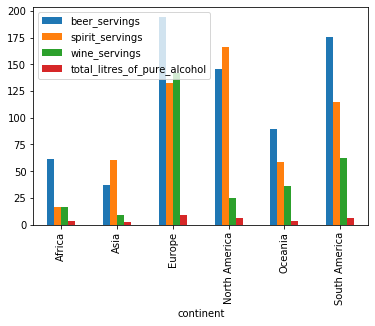

In [76]:
drinks.groupby('continent').mean().plot(kind='bar')

<h4> Exploring pandas Series </h4>

In [77]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [78]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [79]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [80]:
movies.genre.value_counts()#Shows # of times a unique value occurs in the genre column
#value_counts() is mostly used on columns having object type values as it lists down diff category of data present in the column

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [81]:
movies.genre.value_counts(normalize=True)#Represents all the raw counts in the form of percentages

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [82]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [83]:
movies.genre.nunique()# number of unique genre values

16

In [84]:
pd.crosstab(movies.genre, movies.content_rating)#Pass 2 different series

#Eg: how do u interpret the result-
# there are 3 Action movies that have content-rating as 'APPROVED'
# there are 23 Adventure movies that have content-rating 'PG-13'

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


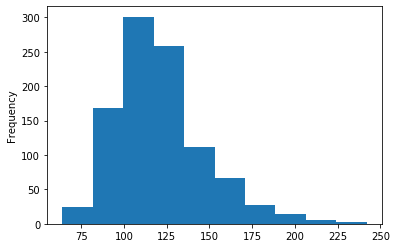

In [85]:
%matplotlib inline
movies.duration.plot(kind='hist')#histogram

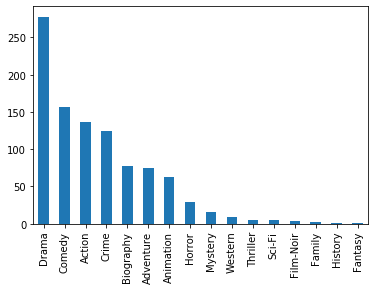

In [86]:
movies.genre.value_counts().plot(kind='bar')

<h4>Handling missing values in pandas</h4>

In [87]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [88]:
ufo.columns, ufo.describe(), ufo.shape

(Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object'),
            City Colors Reported Shape Reported  State              Time
 count     18216            2882          15597  18241             18241
 unique     6476              27             27     52             16145
 top     Seattle             RED          LIGHT     CA  11/16/1999 19:00
 freq        187             780           2803   2529                27,
 (18241, 5))

In [89]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [90]:
ufo.isnull().tail()# Marks the value True wherever the actual value is NaN else marks it False where there is any other value except NaN

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [91]:
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [92]:
ufo.isnull().sum()#When there is a mathematical operation on a boolean value, Pandas converts all True values to 1's and False values to 0's

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [93]:
ufo[ufo.City.isnull()]# Get all rows from the DataFrame where City is NaN

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [94]:
ufo.dropna(how='any').shape #Drop all rows for which any of the columns have a missing value

(2486, 5)

In [95]:
ufo.dropna(how='all').shape #Drop all rows only when all of its columns have missing values

(18241, 5)

In [96]:
ufo.dropna(subset=['City','Shape Reported'], how='any').shape #Drop a row when either City or Shape Reported column has a missing value

(15576, 5)

In [97]:
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

In [98]:
ufo['Shape Reported'].value_counts()

VARIOUS      2977
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
HEXAGON         1
PYRAMID         1
FLARE           1
DOME            1
Name: Shape Reported, dtype: int64

<h4> Things to know about Pandas Index </h4>

In [99]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [100]:
drinks.index #drinks DF has in all 193 rows as shown by Index, 0th row is the column header

RangeIndex(start=0, stop=193, step=1)

In [101]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [102]:
drinks.shape

(193, 6)

In [103]:
#Indexes exist for identification and selection
drinks.loc[23, 'beer_servings'] #loc attribute to select value at Row#23 and column beer_servings

245

In [104]:
#In above example, user needs to remember the row index which is not convenient. Trying to set country as index, so that user can directly retrieve value based on name of the country
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [105]:
drinks.shape #1 colummn reduced as we set one of the columns as the index

(193, 5)

In [106]:
drinks.loc['Brazil','beer_servings']

245

In [107]:
#Resetting the index
drinks.index.name='country' #Telling Pandas to have existing index as one of the columns
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [108]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [109]:
drinks.set_index('country',inplace=True)
drinks.continent.head(10), drinks.shape

(country
 Afghanistan                   Asia
 Albania                     Europe
 Algeria                     Africa
 Andorra                     Europe
 Angola                      Africa
 Antigua & Barbuda    North America
 Argentina            South America
 Armenia                     Europe
 Australia                  Oceania
 Austria                     Europe
 Name: continent, dtype: object, (193, 5))

In [110]:
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12])

In [111]:
drinks.continent.value_counts()['Africa']

53

In [112]:
drinks.continent.value_counts().sort_values() #Sort accd to index values (numerical sorting)

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [113]:
drinks.continent.value_counts().sort_index() #Sort accd to Index(alphabetically in this case)

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [114]:
people = pd.Series([3000000, 85000], index=['Albania','Andorra'], name='population')
people

Albania    3000000
Andorra      85000
Name: population, dtype: int64

In [115]:
drinks.beer_servings * people #NaN against a few as people population is only available for Albania and Andorra

Afghanistan            NaN
Albania        267000000.0
Algeria                NaN
Andorra         20825000.0
Angola                 NaN
                  ...     
Venezuela              NaN
Vietnam                NaN
Yemen                  NaN
Zambia                 NaN
Zimbabwe               NaN
Length: 193, dtype: float64

In [116]:
#Adding People series to the original DataFrame
pd.concat([drinks, people], axis=1).head()

/home/sagar/.virtualenvs/pandas_demo/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,3000000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,85000.0
Angola,217,57,45,5.9,Africa,NaN


<h4> Selecting multiple rows and columns from a DataFrame </h4>

In [117]:
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [118]:
ufo.loc[0, :] #Row 0 and all columns as a Panda Series object

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [119]:
ufo.loc[0:2, :] #loc 0;2 means include both 0th and 2nd row inclusive unlike list slicing where 2 would have been exclusive

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [120]:
ufo.loc[:, 'City']#loc is used for accessing positions by label

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
18236              Grant Park
18237             Spirit Lake
18238             Eagle River
18239             Eagle River
18240                    Ybor
Name: City, Length: 18241, dtype: object

In [121]:
ufo.loc[0:2, 'City':'State'] #Rows 0 thru 2 and columns City thru State

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [122]:
#instead of above , you can also do something like below
ufo.head(3).drop('Time', axis=1)

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [123]:
ufo[ufo.City=='Oakland'].head()

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00
7293,Oakland,NaN,LIGHT,CA,3/28/1994 17:00
8488,Oakland,NaN,VARIOUS,CA,8/10/1995 21:45


In [124]:
ufo.loc[ufo.City=='Oakland', 'State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

In [125]:
ufo.iloc[0:3,0:4]#iloc is exclusive of the 2nd number. used for index based row/column selection
#iloc is used for accessign positions by integer

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [126]:
drinks.head(2)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe


In [127]:
ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [128]:
ufo.drop('City', axis=1).head(2)

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00


<h4> Making Pandas DataFrame smaller and Faster </h4>

In [129]:
drinks.head(2)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe


In [130]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [131]:
drinks.info() # shows count of non-null values in all columns and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [132]:
drinks.info(memory_usage='deep')# Shows actual mem occupied by referring values in each of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 30.5 KB


In [133]:
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [134]:
drinks['continent'] = drinks.continent.astype('category')
drinks.dtypes #Converting the continent column to a category datatype. Under the hood the continent is stored as a category

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [135]:
drinks.continent.cat.codes.unique()#Instead of storing continent as strings Pandas refers to a lookup table to refer each continent with a numeric value

array([1, 2, 0, 3, 5, 4])

In [136]:
drinks.continent.cat.codes.head() #Pandas is now representing all continents as a category.Using a cateogy datatype also reduces the overall memory footprint. Using category datatype also helps to speed-up computations

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [137]:
df = pd.DataFrame({'ID':[100,101,102,103], 'quality':['good','very good','good','excellent']})
df

,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [138]:
df.sort_values('quality')

,ID,quality
3,103,excellent
0,100,good
2,102,good
1,101,very good


In [139]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=["good","very good","excellent"], ordered=True)
df['quality'] = df.quality.astype('category',cat_type)

In [140]:
df.quality

0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [excellent, good, very good]

In [141]:
df.sort_values('quality')

,ID,quality
3,103,excellent
0,100,good
2,102,good
1,101,very good


<h4>Creating dummy variables in Pandas</h4>

In [142]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
train['Sex_male'] = train.Sex.map({'female':0,'male':1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [144]:
pd.get_dummies(train.Sex)#get_dummies creates as many no. of columns as the no. of distinct values in the train.Sex column

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [145]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [146]:
pd.get_dummies(train.Embarked)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


<h4> Working with dates and times in pandas </h4>

In [165]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [156]:
ufo['Time'] = pd.to_datetime(ufo.Time)# Initially the time column was of object type
ufo.head(), ufo.dtypes #Afer the above operation the column is now in datetime format

(                   City Colors Reported Shape Reported State  \
 0                Ithaca             NaN       TRIANGLE    NY   
 1           Willingboro             NaN          OTHER    NJ   
 2               Holyoke             NaN           OVAL    CO   
 3               Abilene             NaN           DISK    KS   
 4  New York Worlds Fair             NaN          LIGHT    NY   
 
                  Time  
 0 1930-06-01 22:00:00  
 1 1930-06-30 20:00:00  
 2 1931-02-15 14:00:00  
 3 1931-06-01 13:00:00  
 4 1933-04-18 19:00:00  , City                       object
 Colors Reported            object
 Shape Reported             object
 State                      object
 Time               datetime64[ns]
 dtype: object)

In [162]:
print(f'{ufo.Time.dt.hour}')
print(f'{ufo.Time.dt.weekday}')
print(f'{ufo.Time.dt.weekday_name}')
print(f'{ufo.Time.dt.dayofyear}')

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64
0        6
1        0
2        6
3        0
4        1
        ..
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int64
0         Sunday
1         Monday
2         Sunday
3         Monday
4        Tuesday
          ...   
18236     Sunday
18237     Sunday
18238     Sunday
18239     Sunday
18240     Sunday
Name: Time, Length: 18241, dtype: object
0        152
1        181
2         46
3        152
4        108
        ... 
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int64


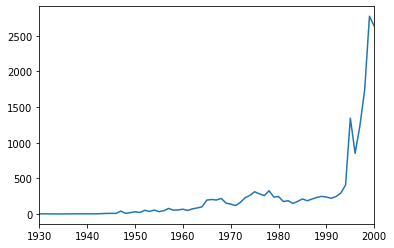

In [177]:
%matplotlib inline
ufo['Year'] = ufo.Time.dt.year
ufo.Year.value_counts().sort_index().plot()

<h4> Find and Remove duplicate rows </h4>

In [180]:
user_cols = ['user_id','age','gender','occupation','zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [187]:
users[users.zip_code.duplicated()]

,age,gender,occupation,zip_code
user_id,,,,
29,41,M,programmer,94043
52,18,F,student,55105
56,25,M,librarian,46260
84,32,M,executive,55369
92,32,M,entertainment,80525
104,27,M,student,55108
105,24,M,engineer,94043
142,13,M,other,48118
181,26,M,executive,21218


In [184]:
users.zip_code.duplicated().sum()#count of all rows where zip_code is duplicate

148

In [188]:
users.duplicated().sum()#count of all rows where entire row is duplicate

7

In [190]:
users.loc[users.duplicated(),:]# Show all those 7 duplicate rows

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [191]:
#keep='first' will only drop the last 7 dupe rows keeping intact the first 7
#keep='last' will only drop the first 7 rows keeping intact the last 7
#keep=False will show all 14 rows which are a duplicate of each other
users.loc[users.duplicated(keep=False),:]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [195]:
users.drop_duplicates(keep='last').shape#drop duplicates

(936, 4)

In [197]:
#Finding duplicates bsed on a certain subset of columns
users.duplicated(subset=['age','zip_code']).sum()

16

<h4> Merging DataFrames</h4>

In [207]:
df1 = pd.DataFrame({'city':['new york','chicago','orlando','baltimore'],'temperature':[21,14,35,32]})
df2 = pd.DataFrame({'city':['chicago','new york','san francisco'],'humidity':[65,68,75]})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,32


In [208]:
df2

,city,humidity
0,chicago,65
1,new york,68
2,san francisco,75


In [209]:
df3 = pd.merge(df1,df2,on='city')
df3#result only has newyork and chicago as those are the cities common b/w 2 dataframes. Merge takes common elements(inner join/intersection) in 2 dataframes

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [212]:
df4 = pd.merge(df1,df2,on='city',how='outer')
df4#takes common + all uncommon ones from both left and right df's and marks its attributes as NaN

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,baltimore,32.0,NaN
4,san francisco,NaN,75.0


In [214]:
df5 = pd.merge(df1,df2,on='city',how='left')
df5#takes common + all uncommon ones from left(df1) df and marks its attributes as NaN

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,32,NaN


In [215]:
df6 = pd.merge(df1,df2,on='city',how='right')
df6#takes common + all uncommon ones from right(df2) df and marks its attributes as NaN

,city,temperature,humidity
0,new york,21.0,68
1,chicago,14.0,65
2,san francisco,NaN,75


In [216]:
#Set an indicator to indicate where the uncommon elements are coming from 
df7 = pd.merge(df1,df2,on='city',how='outer', indicator = True)
df7#takes common + all uncommon ones from both left and right df's and marks its attributes as NaN

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,baltimore,32.0,NaN,left_only
4,san francisco,NaN,75.0,right_only
